In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
df = pd.read_csv('/content/Uber-Jan-Feb-FOIL.csv')
df.columns = df.columns.str.strip()

print("Dataset Loaded Successfully ✅")

Dataset Loaded Successfully ✅


In [67]:
print(df.columns.tolist())



['dispatching_base_number', 'date', 'active_vehicles', 'trips']


In [68]:
df['date'] = pd.to_datetime(df['date'])


In [70]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.dayofweek
df['year'] = df['date'].dt.year


In [71]:
print(df.head())
print(df.info())


  dispatching_base_number       date  active_vehicles  trips  day  month  \
0                  B02512 2015-01-01              190   1132    1      1   
1                  B02765 2015-01-01              225   1765    1      1   
2                  B02764 2015-01-01             3427  29421    1      1   
3                  B02682 2015-01-01              945   7679    1      1   
4                  B02617 2015-01-01             1228   9537    1      1   

   weekday  year  
0        3  2015  
1        3  2015  
2        3  2015  
3        3  2015  
4        3  2015  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dispatching_base_number  354 non-null    object        
 1   date                     354 non-null    datetime64[ns]
 2   active_vehicles          354 non-null    int64         
 3   trips          

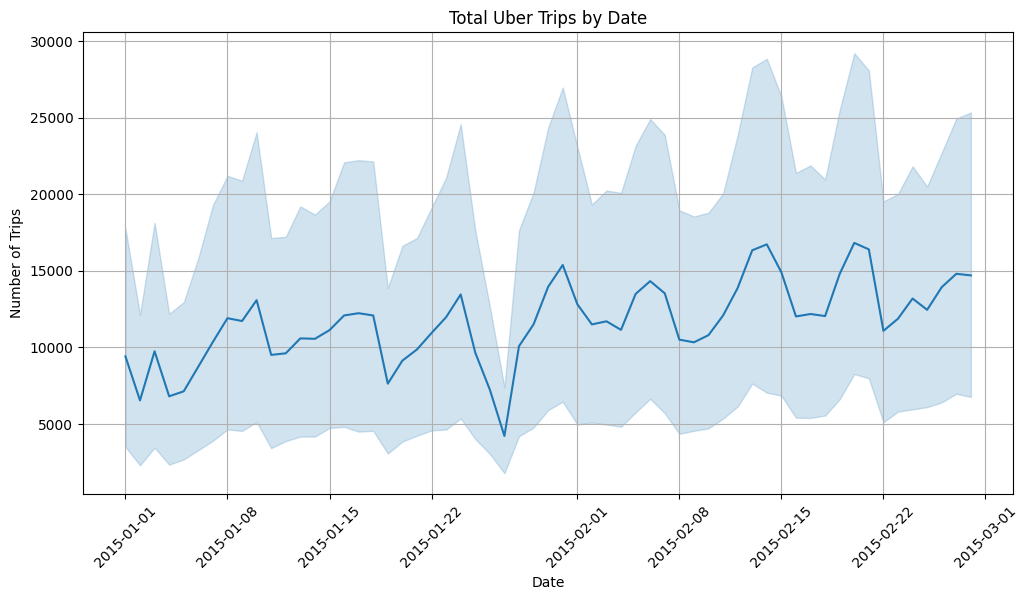

In [72]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='trips')
plt.title('Total Uber Trips by Date')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


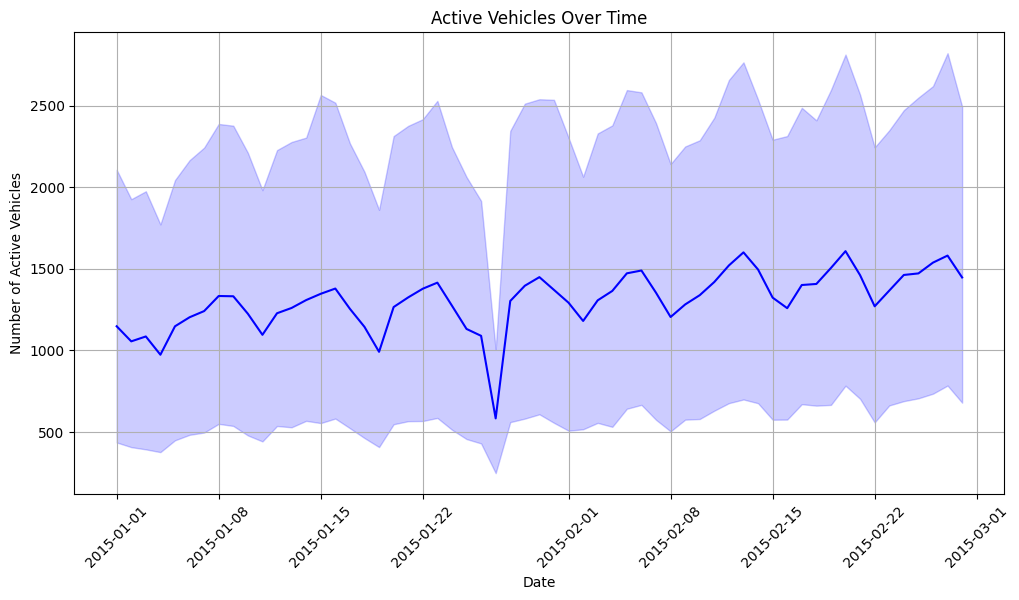

In [73]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='active_vehicles', color='blue')
plt.title('Active Vehicles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Active Vehicles')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


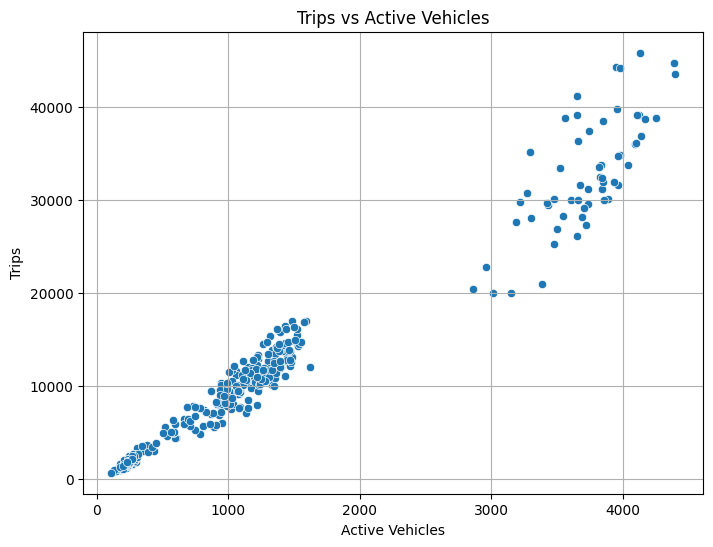

In [74]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='active_vehicles', y='trips')
plt.title('Trips vs Active Vehicles')
plt.xlabel('Active Vehicles')
plt.ylabel('Trips')
plt.grid(True)
plt.show()


In [76]:
X = df[['active_vehicles', 'day', 'month', 'weekday']]
y = df['trips']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf')
}

results = {}

In [79]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [80]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'y_pred': y_pred
    }


In [81]:
y_pred = model.predict(X_test)

In [82]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [59]:
print("\n📊 Model Evaluation")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"🔹 R² Score (Accuracy): {r2:.2f}")


📊 Model Evaluation
🔹 Mean Squared Error (MSE): 2512085.54
🔹 Root Mean Squared Error (RMSE): 1584.96
🔹 R² Score (Accuracy): 0.98


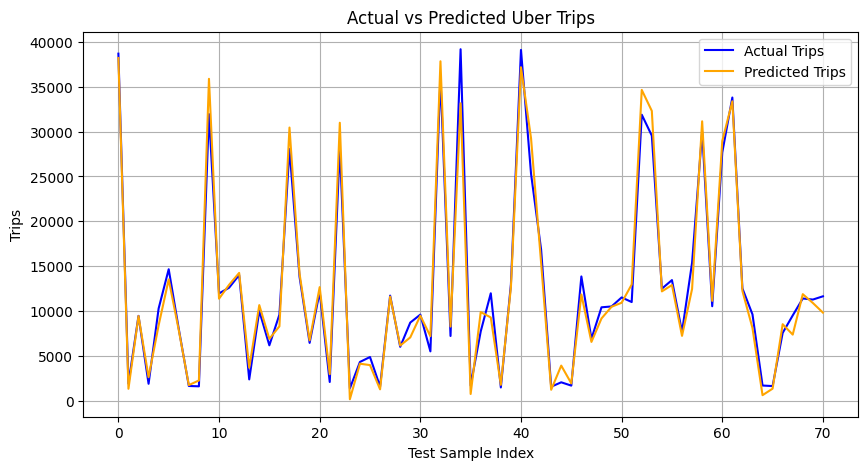

In [60]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Trips', color='blue')
plt.plot(y_pred, label='Predicted Trips', color='orange')
plt.legend()
plt.title('Actual vs Predicted Uber Trips')
plt.xlabel('Test Sample Index')
plt.ylabel('Trips')
plt.grid(True)
plt.show()


In [84]:
print("🔍 Model Performance Summary:")
for model_name, metrics in results.items():
    print(f"\n📌 {model_name}")
    print(f"🔹 R² Score (Accuracy): {metrics['R2']:.4f}")
    print(f"🔹 MSE: {metrics['MSE']:.2f}")
    print(f"🔹 RMSE: {metrics['RMSE']:.2f}")

🔍 Model Performance Summary:

📌 Linear Regression
🔹 R² Score (Accuracy): 0.9767
🔹 MSE: 2512085.54
🔹 RMSE: 1584.96

📌 Decision Tree
🔹 R² Score (Accuracy): 0.9781
🔹 MSE: 2356602.35
🔹 RMSE: 1535.12

📌 Random Forest
🔹 R² Score (Accuracy): 0.9858
🔹 MSE: 1535969.38
🔹 RMSE: 1239.34

📌 Support Vector Regressor
🔹 R² Score (Accuracy): -0.0775
🔹 MSE: 116190808.76
🔹 RMSE: 10779.18
